<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>1. Набор данных диабета </h2>

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [157]:
print("Keys of diabetes(): \n{}".format(diabetes.keys()))

Keys of diabetes(): 
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [158]:
print("Shape of the array data for diabetes dataset: {}".format(diabetes.data.shape))

Shape of the array data for diabetes dataset: (442, 10)


In [159]:
print("Name of the features:\n{}".format(diabetes.feature_names))

Name of the features:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [160]:
print(diabetes['DESCR']+"\n...")

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [161]:
diabetes_data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [162]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


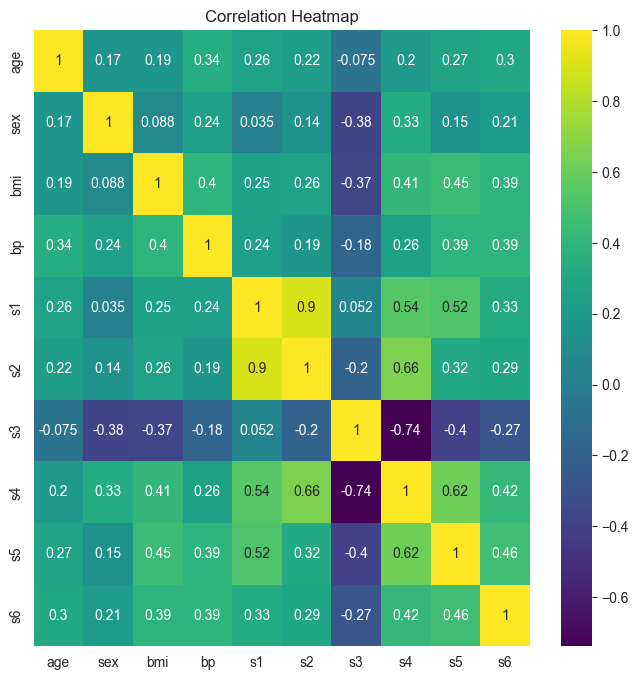

In [163]:
correlation = diabetes_data.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cmap='viridis', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [221]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [223]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 10)
(111, 10)
(331,)
(111,)


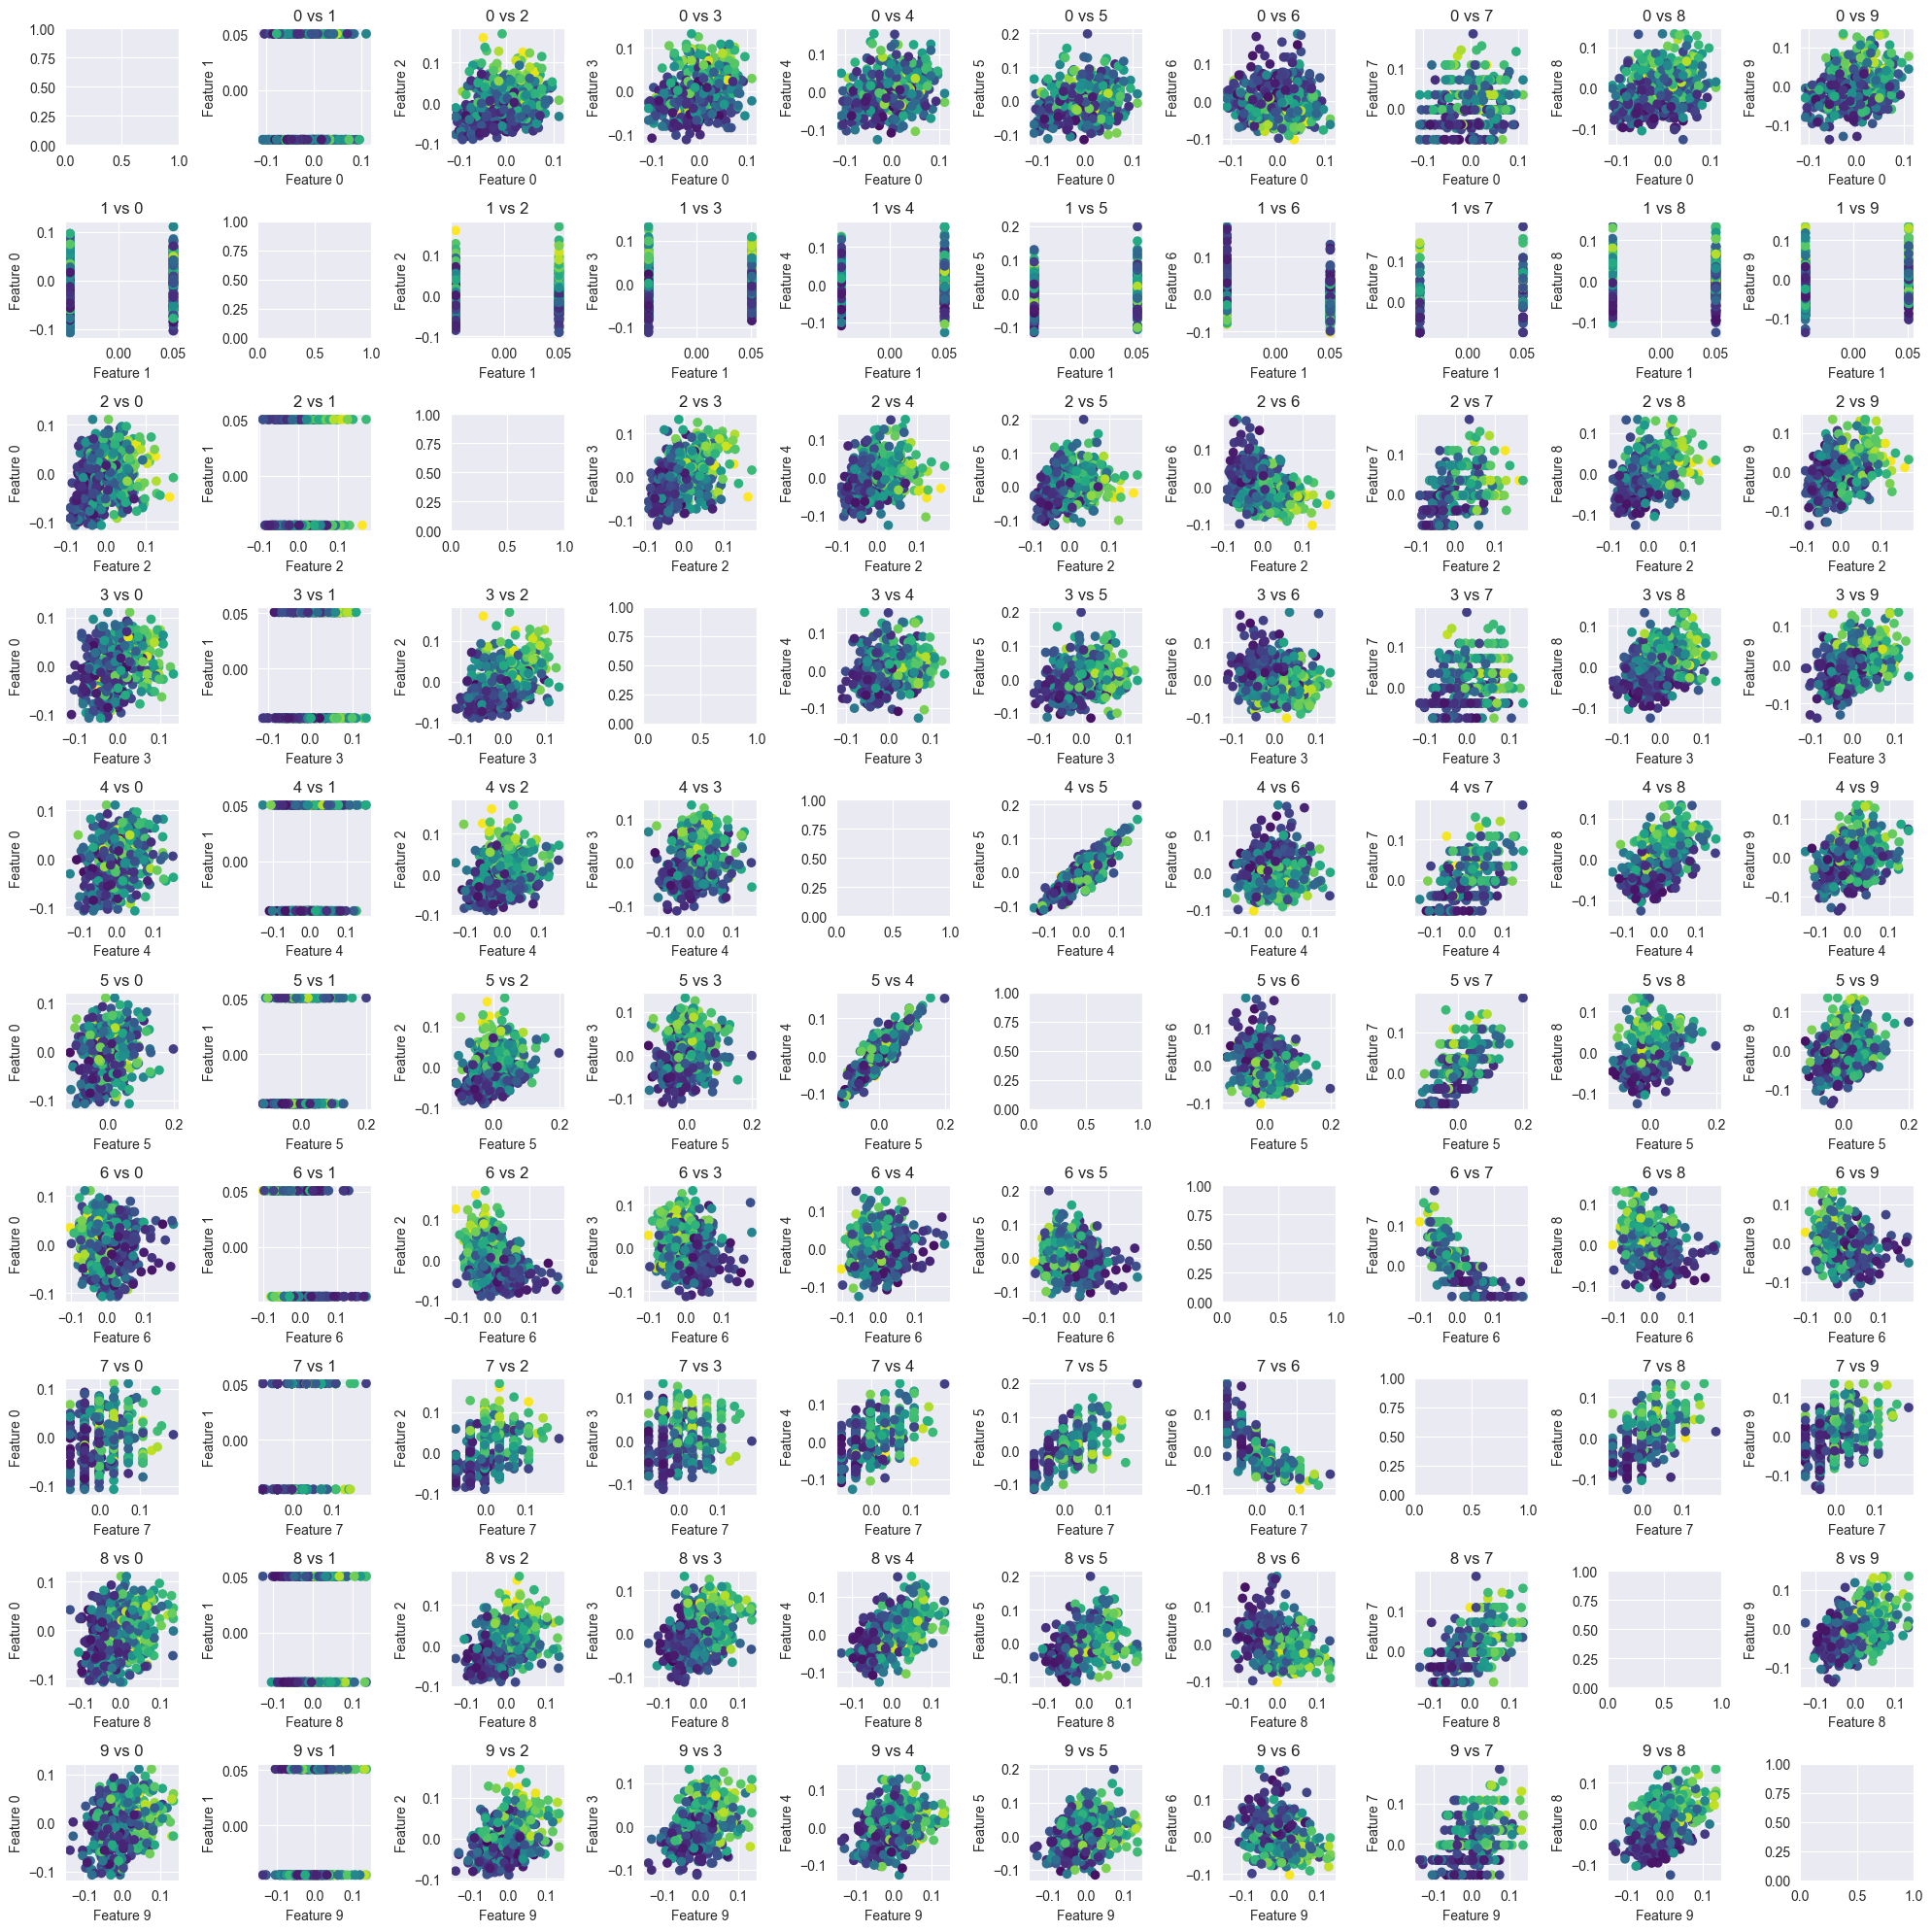

In [185]:
# Создание графиков для всех возможных комбинаций признаков
num_features = X.shape[1]

fig, axes = plt.subplots(num_features, num_features, figsize=(20, 20))

for i in range(num_features):
    for j in range(num_features):
        if i != j:
            axes[i, j].scatter(X[:, i], X[:, j], c=y, cmap='viridis')
            axes[i, j].set_xlabel("Feature {}".format(i))
            axes[i, j].set_ylabel("Feature {}".format(j))
            axes[i, j].set_title("{} vs {}".format(i, j))

plt.tight_layout()
plt.show()

<h1>KNeighborsClassifier</h1>

In [167]:
X, y = diabetes.data, diabetes.target
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [168]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))
print("Correctness on the test set: {:.2f}".format(clf.score(X_test,y_test)))

Prediction on the test set: [ 67.  90.  69. 248.  51.  95. 178. 100.  74.  53.  59.  93.  59. 120.
  53.  44. 123. 163.  44. 129.  78.  59.  59. 150. 103.  91. 127.  91.
  51.  51.  55.  69.  51.  91. 115. 178.  51.  51.  81.  75.  49.  65.
  47.  81. 134.  59.  55.  64.  42.  93.  31.  51.  55.  49. 138. 103.
  49. 127.  60.  59.  67.  78.  44.  65.  93.  67. 163.  91. 134.  58.
  58. 122. 155.  58.  65. 138. 100.  99. 177. 151.  69.  25.  51.  57.
  49.  59.  61.  42.  97. 122.  51. 195.  65.  53.  31.  66. 123.  78.
  51.  49.  91.  47. 220.  70.  97.  61.  47.  65.  67.  25.  51.]
Correctness on the test set: 0.00


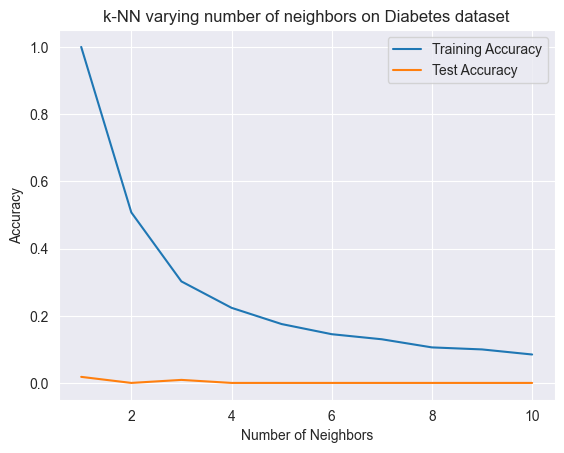

In [169]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()
plt.title("k-NN varying number of neighbors on Diabetes dataset")
plt.show()

<h1>KNeighborsRegressor</h1>

In [170]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor1 = KNeighborsRegressor(n_neighbors=1)
knn_regressor1.fit(X_train, y_train)

knn_regressor3 = KNeighborsRegressor(n_neighbors=3)
knn_regressor3.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [171]:
print("Predictions on the test set with knn=1: \n{}".format(knn_regressor1.predict(X_test)))

Predictions on the test set with knn=1: 
[230. 155. 170. 249.  51. 141. 233. 139. 104.  71.  59. 182.  85. 311.
  88. 252. 332. 180. 252. 275.  99.  78. 111. 163. 103. 127. 178. 257.
  59. 177. 144. 144.  88. 129. 164. 252.  74.  51. 311.  75. 111.  75.
 225.  89. 265.  75.  69.  65. 181.  93. 210. 134.  55. 148. 138. 142.
  59. 225. 115.  93. 121.  99.  85.  65.  93. 236. 163. 225. 150. 126.
  58. 212. 155.  58.  65. 235. 252. 151. 178. 225. 144. 210.  53.  87.
  49.  93. 114. 181. 147. 163. 111. 195. 114.  59.  72.  66. 310. 265.
 115.  49. 150. 129. 258.  72.  97. 143.  47. 185.  95. 293. 131.]


In [172]:
print("Predictions on the test set with knn=3: \n{}".format(knn_regressor3.predict(X_test)))

Predictions on the test set with knn=3: 
[130.66666667 194.66666667 145.         239.         168.66666667
 131.33333333 239.66666667 177.66666667  98.          80.66666667
  72.         151.66666667 120.66666667 196.66666667  67.
 133.33333333 274.         262.33333333 207.33333333 256.66666667
 150.66666667  72.66666667  94.33333333 182.66666667 132.66666667
 145.66666667 176.66666667 158.33333333  76.         108.33333333
 171.33333333 142.33333333  83.33333333 196.66666667 143.
 246.          73.66666667 168.66666667 170.66666667  96.33333333
  84.33333333 113.66666667 133.         165.66666667 211.
  77.          61.          71.         101.66666667 133.33333333
 157.66666667 106.         145.         125.33333333 176.66666667
 143.33333333  68.33333333 164.33333333 151.33333333  74.
 145.66666667 108.          64.66666667  75.         142.33333333
 148.66666667 211.33333333 167.         159.         108.66666667
 108.66666667 197.66666667 188.          75.         123.66666667
 

In [173]:
print("R^2 on the test set with knn=1: {:.2f}".format(knn_regressor1.score(X_test,y_test)))
print("R^2 on the test set with knn=3: {:.2f}".format(knn_regressor3.score(X_test,y_test)))

R^2 on the test set with knn=1: -0.08
R^2 on the test set with knn=3: 0.37


In [174]:
print("Correctness on the train set with knn=1: {:.2f}".format(knn_regressor1.score(X_train,y_train)))
print("Correctness on the train set with knn=3: {:.2f}".format(knn_regressor3.score(X_train,y_train)))

Correctness on the train set with knn=1: 1.00
Correctness on the train set with knn=3: 0.63


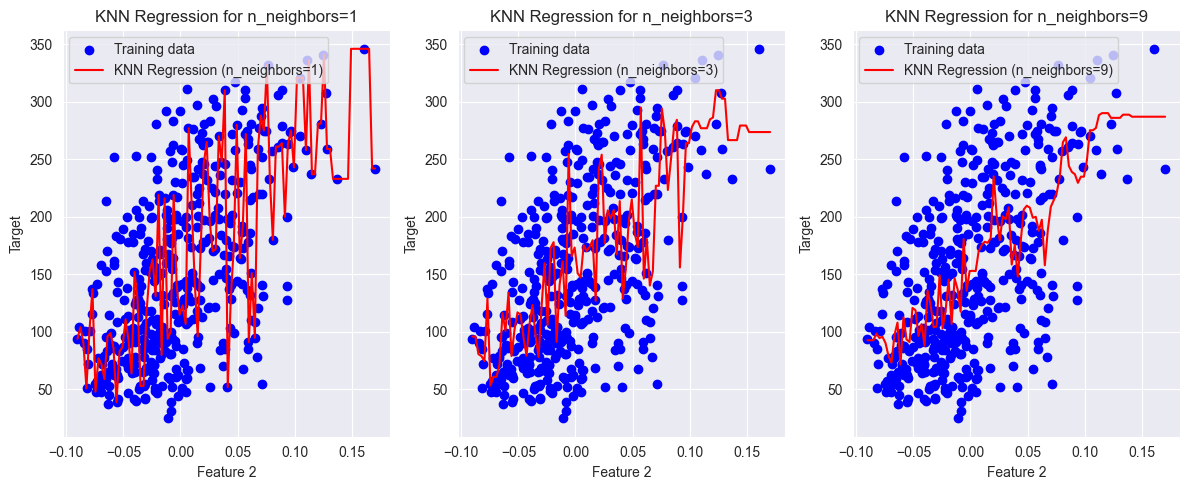

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Selecting a single feature for demonstration
feature_index = 2  # Change this index to visualize different features

# Reshape to comply with scikit-learn's requirements
X_feature = X[:, feature_index].reshape(-1, 1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for i, n_neighbors in enumerate([1, 3, 9], start=1):
    # Initialize KNeighborsRegressor with different n_neighbors
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_feature, y)

    # Generating test data for visualization
    X_test = np.linspace(X_feature.min(), X_feature.max(), 100).reshape(-1, 1)
    y_pred = knn.predict(X_test)

    # Plotting on each subplot
    axes[i - 1].scatter(X_feature, y, label='Training data', c='b')
    axes[i - 1].plot(X_test, y_pred, label=f'KNN Regression (n_neighbors={n_neighbors})', c='r')
    axes[i - 1].set_xlabel(f"Feature {feature_index}")
    axes[i - 1].set_ylabel("Target")
    axes[i - 1].legend()
    axes[i - 1].set_title(f"KNN Regression for n_neighbors={n_neighbors}")

plt.tight_layout()
plt.show()

<h1>LinearRegression</h1>

In [176]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)


In [177]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]
lr.intercept_:151.6651755919933


In [186]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.52
Correctness on the test set: 0.48


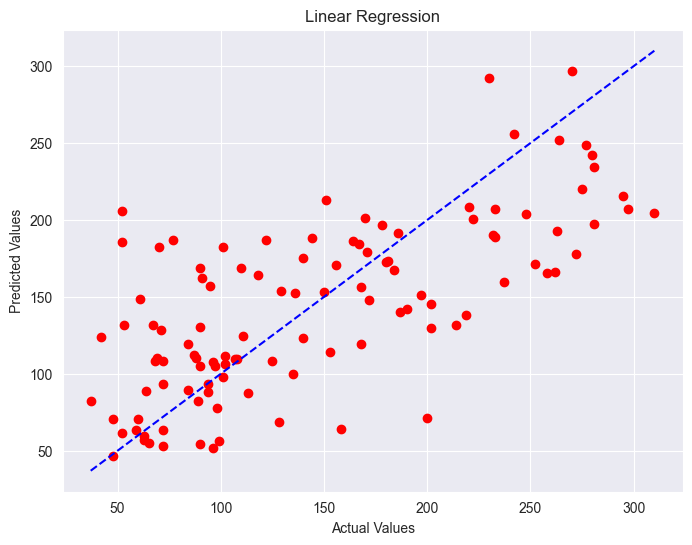

In [187]:
y_pred = lr.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

<h1>Ridge</h1>

In [188]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [189]:
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test,y_test)))

Correctness on the train set: 0.43
Correctness on the test set: 0.44


In [190]:
print("Correctness on the train set: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge01.score(X_test,y_test)))

Correctness on the train set: 0.51
Correctness on the test set: 0.49


In [191]:
print("Correctness on the train set: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge10.score(X_test,y_test)))

Correctness on the train set: 0.15
Correctness on the test set: 0.16


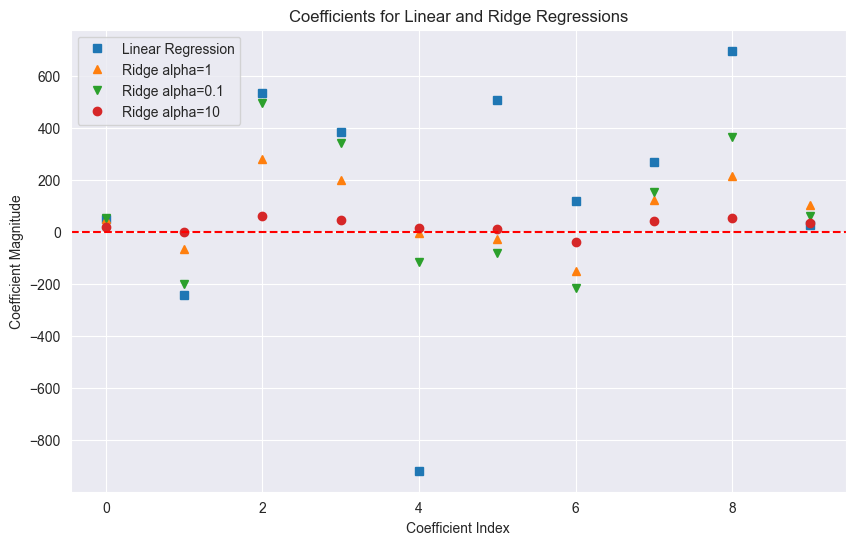

In [192]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, 's', label="Linear Regression")
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")

plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.title("Coefficients for Linear and Ridge Regressions")
plt.legend()
plt.show()

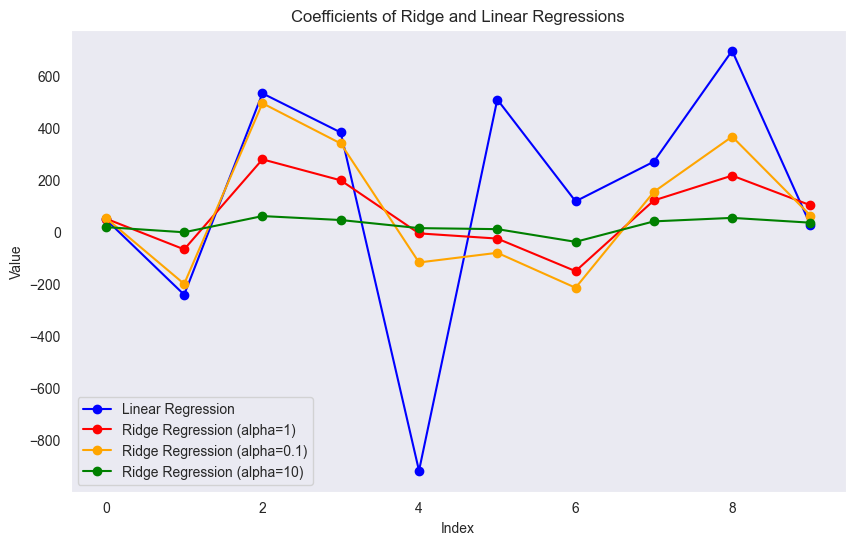

In [193]:
plt.figure(figsize=(10, 6))

plt.plot(lr.coef_, marker='o', label='Linear Regression', color='blue')
plt.plot(ridge.coef_, marker='o', label='Ridge Regression (alpha=1)', color='red')
plt.plot(ridge01.coef_, marker='o', label='Ridge Regression (alpha=0.1)', color='orange')
plt.plot(ridge10.coef_, marker='o', label='Ridge Regression (alpha=10)', color='green')

plt.xlabel('Index')
plt.ylabel('Value')

plt.title('Coefficients of Ridge and Linear Regressions')
plt.legend()
plt.grid()
plt.show()

<h1>Lasso</h1>

In [194]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)

In [195]:
print("Correctness on the train set: {:.2f}".format(lasso.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))

Correctness on the train set: 0.35
Correctness on the test set: 0.38
Number of the used features: 3


In [196]:
print("Correctness on the train set: {:.2f}".format(lasso01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso01.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso01.coef_ != 0)))

Correctness on the train set: 0.51
Correctness on the test set: 0.50
Number of the used features: 7


In [197]:
print("Lasso alpha=1 coef:", lasso.coef_)
print("Lasso alpha=0.1 coef:", lasso01.coef_)
print("Lasso alpha=10 coef:", lasso10.coef_)

Lasso alpha=1 coef: [  0.          -0.         398.3858307   46.17542123   0.
   0.          -0.           0.         238.18730888   0.        ]
Lasso alpha=0.1 coef: [   0.         -151.41421088  540.86229781  337.22131939  -85.18947609
   -0.         -262.90206877    0.          418.24702559    9.92565297]
Lasso alpha=10 coef: [ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


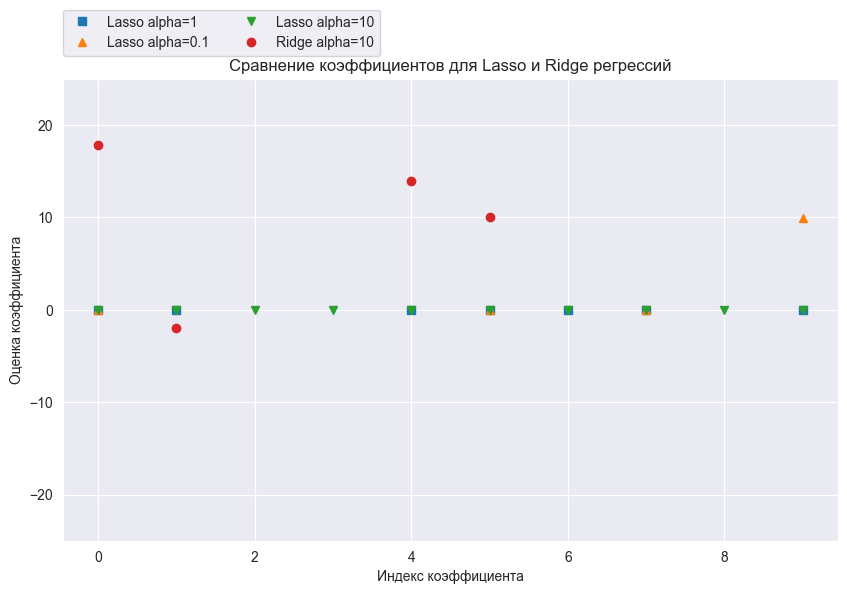

In [198]:
plt.figure(figsize=(10, 6))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso01.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso10.coef_, 'v', label="Lasso alpha=10")
plt.plot(ridge10.coef_, 'o', label="Ridge alpha=10")

plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.title("Сравнение коэффициентов для Lasso и Ridge регрессий")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()

<h1>LogisticRegression</h1>

In [253]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=10).fit(X_train,y_train)
print("Correctness on the train set C=1: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness on the test set C=1: {:.3f}".format(logreg.score(X_test,y_test))) 
# print("Correctness on the train set C=1: {:.3f}".format(scores.score(X_train,y_train)))
# print("Correctness on the test set C=1: {:.3f}".format(scores.score(X_test,y_test))) /

Correctness on the train set C=1: 0.015
Correctness on the test set C=1: 0.009


In [201]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Correctness on the train set C=100: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness on the test set C=100: {:.3f}".format(logreg100.score(X_test,y_test)))   

Correctness on the train set C=100: 0.172
Correctness on the test set C=100: 0.018


In [202]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Correctness on the train set C=0.1: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness on the test set C=0.1: {:.3f}".format(logreg001.score(X_test,y_test))) 

Correctness on the train set C=0.1: 0.015
Correctness on the test set C=0.1: 0.009


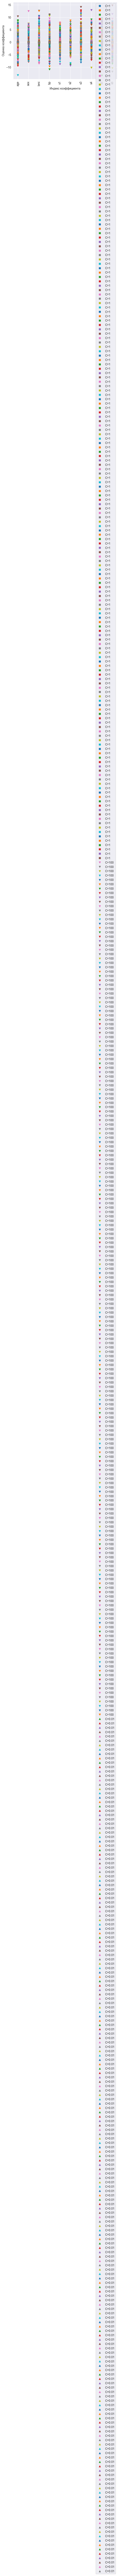

In [205]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, 'v', label="C=100")
plt.plot(logreg001.coef_.T, '^', label="C=0.01")

plt.xticks(range(diabetes.data.shape[1]),diabetes.feature_names, rotation=90)
    
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()